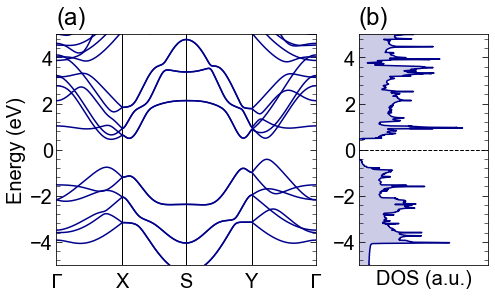

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']   = 20

fig = plt.figure(figsize=[12,8])

axBnd = fig.add_axes([0.00, 0.0, 0.30, 0.4])
axDOS = fig.add_axes([0.35, 0.0, 0.15, 0.4])

prefix    = 'GeTe-mono'
folderBnd = 'Bands/'
folderDOS = 'DOS/'

EFermi = (0.0851+1.0353)/2.0

#------------------------------------------------------------------#
#  Band Structure
#------------------------------------------------------------------#

nBand = 60
nkpts = 201

fBand = open(folderBnd+prefix+'.bands.gnu', 'r')
dataBnd = [line for line in fBand.readlines() if line.strip()]
fBand.close()

kpts = []
for ik in range (nkpts):
    kpts.append(float(dataBnd[ik].split()[0]))
    
# Data kpoint untuk tiap band
band = []
for ib in range (nBand):
    band.append([])
    for ik in range (nkpts):
        band[ib].append(float(dataBnd[ib*nkpts+ik].split()[1]))

# Data band untuk tiap kpoint
eBnd = []
for ik in range (nkpts):
    eBnd.append([])
    for ib in range (nBand):
        eBnd[ik].append(band[ib][ik]-EFermi)

# k-path
G1 = kpts[0]
X  = kpts[50]
S  = kpts[100]
Y  = kpts[150]
G2 = kpts[200]

axBnd.set_xlim(G1,G2)
axBnd.set_ylim(-5,5)

axBnd.set_xticks([G1, X, S, Y, G2])
axBnd.set_xticklabels(['$\Gamma$', 'X', 'S', 'Y', '$\Gamma$'])

axBnd.set_ylabel('Energy (eV)')

axBnd.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2.0))
axBnd.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.4))

axBnd.yaxis.set_tick_params(which='major', size=6, direction='in', right='on')
axBnd.yaxis.set_tick_params(which='minor', size=4, direction='in', right='on')

axBnd.xaxis.set_tick_params(which='major', bottom=False, top=False)

axBnd.axvline(X, color='black', linewidth=1.0)
axBnd.axvline(S, color='black', linewidth=1.0)
axBnd.axvline(Y, color='black', linewidth=1.0)

axBnd.set_title('(a)', loc='left', pad=10)

axBnd.plot(kpts, eBnd, color='darkblue')                        

#------------------------------------------------------------------#
#  DOS
#------------------------------------------------------------------#

eDOS, DOS = np.loadtxt(folderDOS+prefix+'.dos', usecols=(0,1), unpack=True)
maxDOS = np.max(DOS)

axDOS.set_xlim(0,maxDOS)
axDOS.set_ylim(-5,5)

axDOS.set_xticks([])
axDOS.set_xlabel('DOS (a.u.)')

axDOS.axhline(0, color='black', linewidth=1.0, linestyle='--')

axDOS.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2.0))
axDOS.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.4))

axDOS.yaxis.set_tick_params(which='major', size=6, direction='in', right='on')
axDOS.yaxis.set_tick_params(which='minor', size=4, direction='in', right='on')

axDOS.xaxis.set_tick_params(which='major', bottom=False, top=False)

axDOS.set_title('(b)', loc='left', pad=10)

axDOS.plot(DOS,eDOS-EFermi, color='darkblue')
axDOS.fill_betweenx(eDOS-EFermi, 0, DOS, facecolor='darkblue', alpha=0.2)

#plt.show()

plt.savefig('band_dos_GeTe.pdf', bbox_inches='tight')